In [14]:
import requests
import json
import datetime as dt
import pandas as pd
import time
import urllib
import re
import sqlite3

In [3]:
station_name_url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt'
station_name = urllib.request.urlopen(station_name_url).readlines()

In [4]:
station_name_short=[]
for line in station_name:
    #strip extra information
    line = line[:-14]
    line = line.decode('UTF-8')
    
    #split ID, lat, long, and elevation
    line1 = line[0:37]
    line1 = re.split(' +', line1)
    
    #split state place NaN if no information
    line2 = line[37:40]
    if line2.strip() == '':
        line2 = 'NaN'
    else:
        line2 = line2.strip()
    
    #split station name
    line3 = line[40:]
    line3 = line3.strip()
    
    #conbine all in one line
    line1.append(line2)
    line1.append(line3)
    
    station_name_short.append(line1)
station_name_short

[['ACW00011604',
  '17.1167',
  '-61.7833',
  '10.1',
  'NaN',
  'ST JOHNS COOLIDGE FLD'],
 ['ACW00011647', '17.1333', '-61.7833', '19.2', 'NaN', 'ST JOHNS'],
 ['AE000041196', '25.3330', '55.5170', '34.0', 'NaN', 'SHARJAH INTER. AIRP'],
 ['AEM00041194', '25.2550', '55.3640', '10.4', 'NaN', 'DUBAI INTL'],
 ['AEM00041217', '24.4330', '54.6510', '26.8', 'NaN', 'ABU DHABI INTL'],
 ['AEM00041218', '24.2620', '55.6090', '264.9', 'NaN', 'AL AIN INTL'],
 ['AF000040930', '35.3170', '69.0170', '3366.0', 'NaN', 'NORTH-SALANG'],
 ['AFM00040938', '34.2100', '62.2280', '977.2', 'NaN', 'HERAT'],
 ['AFM00040948', '34.5660', '69.2120', '1791.3', 'NaN', 'KABUL INTL'],
 ['AFM00040990', '31.5000', '65.8500', '1010.0', 'NaN', 'KANDAHAR AIRPORT'],
 ['AG000060390', '36.7167', '3.2500', '24.0', 'NaN', 'ALGER-DAR EL BEIDA'],
 ['AG000060590', '30.5667', '2.8667', '397.0', 'NaN', 'EL-GOLEA'],
 ['AG000060611', '28.0500', '9.6331', '561.0', 'NaN', 'IN-AMENAS'],
 ['AG000060680', '22.8000', '5.4331', '1362.0', 'NaN'

In [5]:
df_station_name = pd.DataFrame(station_name_short, columns=['Station ID', 'latitude', 'longitude', 'elevation', 'state', 'station name'])
df_station_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113933 entries, 0 to 113932
Data columns (total 6 columns):
Station ID      113933 non-null object
latitude        113933 non-null object
longitude       113933 non-null object
elevation       113933 non-null object
state           113933 non-null object
station name    113933 non-null object
dtypes: object(6)
memory usage: 5.2+ MB


In [6]:
len(df_station_name[df_station_name.state != 'NaN'])

69956

In [7]:
df_station_name.state.unique()

array(['NaN', 'AS', 'BH', 'BC', 'YT', 'NT', 'NU', 'AB', 'SK', 'MB', 'ON',
       'QC', 'NB', 'NS', 'PE', 'NL', 'MP', 'FM', 'GU', 'UM', 'PW', 'MH',
       'PR', 'SA', 'SD', 'CO', 'NE', 'AK', 'AL', 'AR', 'AZ', 'CA', 'TN',
       'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC',
       'ND', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI',
       'SC', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'PI', 'VI'],
      dtype=object)

In [8]:
station_type_url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-inventory.txt'
station_type = urllib.request.urlopen(station_type_url).readlines()

In [9]:
station_type_list=[]
for line in station_type:
    #decode and remove '\n' 
    line = line.decode('UTF-8')
    line = line[:-1]
    
    #split by space
    line = re.split(' +', line)
    
    station_type_list.append(line)
station_type_list

[['ACW00011604', '17.1167', '-61.7833', 'TMAX', '1949', '1949'],
 ['ACW00011604', '17.1167', '-61.7833', 'TMIN', '1949', '1949'],
 ['ACW00011604', '17.1167', '-61.7833', 'PRCP', '1949', '1949'],
 ['ACW00011604', '17.1167', '-61.7833', 'SNOW', '1949', '1949'],
 ['ACW00011604', '17.1167', '-61.7833', 'SNWD', '1949', '1949'],
 ['ACW00011604', '17.1167', '-61.7833', 'PGTM', '1949', '1949'],
 ['ACW00011604', '17.1167', '-61.7833', 'WDFG', '1949', '1949'],
 ['ACW00011604', '17.1167', '-61.7833', 'WSFG', '1949', '1949'],
 ['ACW00011604', '17.1167', '-61.7833', 'WT03', '1949', '1949'],
 ['ACW00011604', '17.1167', '-61.7833', 'WT08', '1949', '1949'],
 ['ACW00011604', '17.1167', '-61.7833', 'WT16', '1949', '1949'],
 ['ACW00011647', '17.1333', '-61.7833', 'TMAX', '1961', '1961'],
 ['ACW00011647', '17.1333', '-61.7833', 'TMIN', '1961', '1961'],
 ['ACW00011647', '17.1333', '-61.7833', 'PRCP', '1957', '1970'],
 ['ACW00011647', '17.1333', '-61.7833', 'SNOW', '1957', '1970'],
 ['ACW00011647', '17.1333

In [10]:
df_station_type = pd.DataFrame(station_type_list, columns = ['Station ID', 'latitude', 'longitude', 'element type', 'begin year', 'end year'])
df_station_type.head()

,Station ID,latitude,longitude,element type,begin year,end year
0,ACW00011604,17.1167,-61.7833,TMAX,1949,1949
1,ACW00011604,17.1167,-61.7833,TMIN,1949,1949
2,ACW00011604,17.1167,-61.7833,PRCP,1949,1949
3,ACW00011604,17.1167,-61.7833,SNOW,1949,1949
4,ACW00011604,17.1167,-61.7833,SNWD,1949,1949


In [11]:
df_station_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680723 entries, 0 to 680722
Data columns (total 6 columns):
Station ID      680723 non-null object
latitude        680723 non-null object
longitude       680723 non-null object
element type    680723 non-null object
begin year      680723 non-null object
end year        680723 non-null object
dtypes: object(6)
memory usage: 31.2+ MB


In [12]:
df_station_type['begin year'] = pd.to_numeric(df_station_type['begin year'])
df_station_type['end year'] = pd.to_numeric(df_station_type['end year'])

In [13]:
df_station = pd.merge(df_station_name, df_station_type, on = 'Station ID', how = 'inner')
df_station.head()

,Station ID,latitude_x,longitude_x,elevation,state,station name,latitude_y,longitude_y,element type,begin year,end year
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,TMAX,1949,1949
1,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,TMIN,1949,1949
2,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,PRCP,1949,1949
3,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,SNOW,1949,1949
4,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,SNWD,1949,1949


In [14]:
#Save data of station to CSV file
df_station.to_csv('noaa_station.csv')

In [3]:
df_station = pd.read_csv('noaa_station.csv')
df_station.head()

,Unnamed: 0,Station ID,latitude_x,longitude_x,elevation,state,station name,latitude_y,longitude_y,element type,begin year,end year
0,0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,TMAX,1949,1949
1,1,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,TMIN,1949,1949
2,2,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,PRCP,1949,1949
3,3,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,SNOW,1949,1949
4,4,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,17.1167,-61.7833,SNWD,1949,1949


In [17]:
df_station_selected = df_station[(df_station['begin year']<1990)&
                                (df_station['end year']==2019)&
                                (df_station['element type']=='TMAX')|
                                (df_station['element type']=='TMIN')|
                                (df_station['element type']=='PRCP')]
df_station_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160574 entries, 1 to 680722
Data columns (total 11 columns):
Station ID      160574 non-null object
latitude_x      160574 non-null object
longitude_x     160574 non-null object
elevation       160574 non-null object
state           160574 non-null object
station name    160574 non-null object
latitude_y      160574 non-null object
longitude_y     160574 non-null object
element type    160574 non-null object
begin year      160574 non-null int64
end year        160574 non-null int64
dtypes: int64(2), object(9)
memory usage: 14.7+ MB


In [18]:
df_groupby = df_station_selected.groupby('Station ID')
element_count = df_groupby['element type'].count()
station_with_three = element_count[element_count==3].index.tolist()
station_with_three

['AE000041196',
 'AEM00041194',
 'AEM00041217',
 'AFM00040938',
 'AFM00040948',
 'AFM00040990',
 'AG000060390',
 'AG000060590',
 'AG000060611',
 'AGE00147708',
 'AGE00147716',
 'AGE00147718',
 'AGE00147719',
 'AGM00060351',
 'AGM00060355',
 'AGM00060360',
 'AGM00060402',
 'AGM00060419',
 'AGM00060425',
 'AGM00060430',
 'AGM00060445',
 'AGM00060452',
 'AGM00060457',
 'AGM00060468',
 'AGM00060475',
 'AGM00060490',
 'AGM00060507',
 'AGM00060511',
 'AGM00060515',
 'AGM00060522',
 'AGM00060531',
 'AGM00060535',
 'AGM00060536',
 'AGM00060549',
 'AGM00060550',
 'AGM00060555',
 'AGM00060559',
 'AGM00060560',
 'AGM00060566',
 'AGM00060571',
 'AGM00060580',
 'AGM00060581',
 'AGM00060602',
 'AGM00060607',
 'AGM00060620',
 'AGM00060640',
 'AGM00060656',
 'AGM00060670',
 'AJ000037575',
 'AJ000037675',
 'AJ000037735',
 'AJ000037749',
 'AJ000037756',
 'AJ000037985',
 'ALM00013615',
 'AM000037682',
 'AM000037699',
 'AM000037704',
 'AM000037711',
 'AM000037787',
 'AM000037792',
 'AM000037801',
 'AM0000

In [22]:
df_station_selected = df_station_selected[df_station_selected['Station ID'].isin(station_with_three)]
df_station_selected.to_csv('noaa_station_selected.csv')

In [4]:
df_station_selected = pd.read_csv('noaa_station_selected.csv')
df_station_selected[df_station_selected['Station ID']=='USC00034572']

,Unnamed: 0,Station ID,latitude_x,longitude_x,elevation,state,station name,latitude_y,longitude_y,element type,begin year,end year
12456,363561,USC00034572,36.4947,-91.535,153.0,AR,MAMMOTH SPRING,36.4947,-91.535,TMAX,1904,2019
12457,363562,USC00034572,36.4947,-91.535,153.0,AR,MAMMOTH SPRING,36.4947,-91.535,TMIN,1904,2019
12458,363564,USC00034572,36.4947,-91.535,153.0,AR,MAMMOTH SPRING,36.4947,-91.535,PRCP,1904,2019


In [23]:
print(len(df_station_selected[df_station_selected['element type']=='TMAX']))
print(len(df_station_selected[df_station_selected['element type']=='TMIN']))
print(len(df_station_selected[df_station_selected['element type']=='PRCP']))

8388
8388
8388


In [5]:
soybean_state = ['AR','IL','IN','IA','KS','KY','LA','MI','MN','MS','MO','NE','NC','ND','OH','SD','TN','WI']
total = 0
for state in soybean_state:
    number = len(df_station_selected[df_station_selected.state==state])
    total+=number
    print(state, number)
print('total number: ', total)

AR 255
IL 267
IN 213
IA 336
KS 372
KY 117
LA 126
MI 273
MN 312
MS 135
MO 309
NE 297
NC 312
ND 201
OH 210
SD 261
TN 243
WI 318
total number:  4557


In [25]:
df_station_selected_tmax = df_station_selected[df_station_selected['element type']=='TMAX']

In [26]:
df_station_sample=pd.DataFrame()
for state in soybean_state:
    df_element = df_station_selected_tmax[df_station_selected_tmax.state==state].sample(n=5)
    df_station_sample = pd.concat([df_station_sample, df_element])
df_station_sample.to_csv('noaa_station_sample.csv')

In [6]:
df_station_sample = pd.read_csv('noaa_station_sample.csv')

In [7]:
sample_station = df_station_sample['Station ID'].tolist()

In [8]:
#Get API token
with open('api_token.json') as key_file:
    api_token = json.load(key_file)
mytoken = api_token['noaa_token']

In [9]:
start = dt.datetime.strptime('1990-01-01', '%Y-%m-%d')
end = start + dt.timedelta(332)
start < dt.datetime.today()

True

In [10]:
def get_dairy_summury(begin_date, end_date, station):
    
    #Use the same begin and end date for just one day's data. Format for the API request
    begin_date = begin_date
    end_date = end_date #today.strftime("%Y-%m-%d")

    #Location key for the region you are interested in (can be found on NOAA or requested as a different API as well)
    stationid = 'GHCND:'+station #'FIPS:05' #location id for North Dakota
    datasetid = 'GHCND' #datset id for "Daily Summaries"
    datatypeid1 = 'PRCP' #perception
    datatypeid2 = 'TMAX' #max tempurture
    datatypeid3 = 'TMIN' #max tempurture

    #Get weather data from NOAA API
    token = {'token' : mytoken}

    params = 'datasetid='+str(datasetid)+'&'+'datatypeid='+str(datatypeid1)+'&'+'datatypeid='+str(datatypeid2)+'&'+'datatypeid='+str(datatypeid3)+'&'+'stationid='+str(stationid)+'&'+'startdate='+str(begin_date)+'&'+'enddate='+str(end_date)+'&'+'limit=1000'+'&'+'units=standard'

    url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data'

    r = requests.get(url, params=params, headers=token)
    
    data = r.json()
    
    return data
 

In [18]:
# データベースに接続する
#conn = sqlite3.connect('weather.db')
#c = conn.cursor()

# DO NOT DROP if you want to continue collecting data
#c.execute('''DROP TABLE IF EXISTS users''')
#c.execute('''CREATE TABLE IF NOT EXISTS users (date, datatype, station, attributes, value)''')


m=0
# データの挿入
for station in sample_station[74:]:
    
    # connect to database
    conn = sqlite3.connect('weather.db')
    c = conn.cursor()
    
    #set start data as 1990 Jan 1st and today
    start_date = dt.datetime.strptime('1990-01-01', '%Y-%m-%d')
    today = dt.datetime.today()
    
    time.sleep(10)
    
    k=0
    m=m+1
    print(m)
    
    #continue roope until start date become today
    while k==0:
        
        #set end date as start date + 332days since we can get only 1,000data at one call to API
        if start_date + dt.timedelta(days=332) < today:
            end_date = start_date + dt.timedelta(days=332)
        
        else:
            end_date = today - dt.timedelta(days=1)
            k=1
        
        #convert timdelta to string
        start_date = start_date.strftime('%Y-%m-%d')
        end_date = end_date.strftime('%Y-%m-%d')
        
        #get data via API. Break from roop if no data was got.
        data = get_dairy_summury(start_date, end_date, station)
        if data == {}:
            print('Data is missing!! station ID {}'.format(station))
            missing_station.append(station)
            break
            
        else:
            data = data['results']
        
        #write data into sql database
        for val in data:
            c.execute('''INSERT INTO users VALUES (?, ?, ?, ?, ?);''', (val['date'], val['datatype'], val['station'], val['attributes'], val['value']))
    
        #set start date as end date +1day, at final roope start date become today
        end_date = dt.datetime.strptime(end_date, '%Y-%m-%d')
        start_date = end_date + dt.timedelta(days=1)
        
        time.sleep(0.2)
    
    
    # 挿入した結果を保存（コミット）する
    conn.commit()

    # データベースへのアクセスが終わったら close する
    conn.close()
    

1
2
Data is missing!! station ID USC00391392
3
4
5
6
7
8
Data is missing!! station ID USC00408184
9
10
Data is missing!! station ID USC00402680
11
12
13
14
15
Data is missing!! station ID USC00475573
16


In [23]:
#record station which data is missing
missing_station = ['USC00034572', 'USC00124356', 'USC00138693', 'USW00093909', 'USC00142881', 'USC00157677', 
                  'USC00154208', 'USW00012884', 'USC00203504', 'USC00218311', 'USC00238603', 'USC00250070',
                   'USC00322482', 'USC00327585', 'USC00334681', 'USC00391392', 'USC00408184', 'USC00402680',
                   'USC00475573']

In [24]:
len(missing_station)

19

In [20]:
conn = sqlite3.connect('weather.db')
sql = '''SELECT date, datatype, station, attributes, value FROM users'''
df = pd.read_sql(sql, conn)
df.head()

,date,datatype,station,attributes,value
0,1990-01-01T00:00:00,PRCP,GHCND:USC00035186,",,0,0800",0.0
1,1990-01-01T00:00:00,TMAX,GHCND:USC00035186,",,0,0800",44.0
2,1990-01-01T00:00:00,TMIN,GHCND:USC00035186,",,0,0800",31.0
3,1990-01-02T00:00:00,PRCP,GHCND:USC00035186,",,0,0800",0.0
4,1990-01-02T00:00:00,TMAX,GHCND:USC00035186,",,0,0800",44.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2433048 entries, 0 to 2433047
Data columns (total 5 columns):
date          object
datatype      object
station       object
attributes    object
value         float64
dtypes: float64(1), object(4)
memory usage: 92.8+ MB


In [22]:
i=-1
for item in sample_station:
    station = 'GHCND:'+item
    number = len(df[df.station==station])
    i+=1
    if item in missing_station:
        m='missing'
    else:
        m=''
    print(i, item, number, m)

0 USC00035186 32180 
1 USC00034756 32224 
2 USC00032978 31606 
3 USC00033466 31812 
4 USC00034572 0 missing
5 USW00014806 32126 
6 USC00111302 31457 
7 USC00116200 31559 
8 USC00118916 30553 
9 USC00118293 32257 
10 USC00128698 31232 
11 USW00014848 32412 
12 USC00124356 23268 missing
13 USC00127298 31099 
14 USC00126435 29730 
15 USW00014943 32415 
16 USW00014933 32412 
17 USC00135131 31566 
18 USC00138693 3489 missing
19 USC00136327 30119 
20 USW00093909 0 missing
21 USC00142881 0 missing
22 USC00142432 32276 
23 USC00143239 30327 
24 USC00144857 28696 
25 USC00150254 29233 
26 USC00155694 32014 
27 USC00157677 23451 missing
28 USC00154208 519 missing
29 USC00155067 31581 
30 USW00003937 32415 
31 USW00012930 29834 
32 USW00012916 32414 
33 USC00168163 31378 
34 USW00012884 0 missing
35 USC00202250 32112 
36 USC00203744 31371 
37 USC00203504 16309 missing
38 USW00014822 27259 
39 USC00208800 32384 
40 USC00212842 30781 
41 USC00210252 32310 
42 USC00218311 20343 missing
43 USW0001492

In [37]:
time_sta = time.perf_counter()
#Use the same begin and end date for just one day's data. Format for the API request
begin_date = '2018-09-01'
end_date = begin_date #today.strftime("%Y-%m-%d")

#Location key for the region you are interested in (can be found on NOAA or requested as a different API as well)
locationid = state #'FIPS:05' #location id for North Dakota
datasetid = 'GHCND' #datset id for "Daily Summaries"
datatypeid1 = 'PRCP' #perception
datatypeid2 = 'TMAX' #max tempurture
datatypeid3 = 'TMIN' #max tempurture

#Get weather data from NOAA API
token = {'token' : mytoken}

params = 'datasetid='+str(datasetid)+'&'+'datatypeid='+str(datatypeid1)+'&'+'datatypeid='+str(datatypeid2)+'&'+'datatypeid='+str(datatypeid3)+'&'+'locationid='+str(locationid)+'&'+'startdate='+str(begin_date)+'&'+'enddate='+str(end_date)+'&'+'limit=1000'+'&'+'units=standard'

url = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data'

r = requests.get(url, params=params, headers=token)

r.json()



time_end = time.perf_counter()
tim_2 = time_end - time_sta
print(tim_2)

2.0764180700002726


In [88]:
    i_prcp=0
    i_tmax=0
    i_tmin=0
    s_prcp=0
    s_tmax=0
    s_tmin=0
    for val in data['results']:
        if val['datatype'] == 'PRCP':
            i_prcp+=1
            s_prcp+=val['value']
        if val['datatype'] == 'TMAX':
            i_tmax+=1
            s_tmax+=val['value']
        if val['datatype'] == 'TMIN':
            i_tmin+=1
            s_tmin+=val['value']

    return (s_prcp/i_prcp, s_tmax/i_tmax, s_tmin/i_tmin)


In [61]:
time_sta = time.perf_counter()

df = pd.DataFrame.from_dict(data['results'])
print(df[df.datatype == 'PRCP'].value.mean(),\
      df[df.datatype == 'TMAX'].value.mean(),\
      df[df.datatype == 'TMIN'].value.mean())

time_end = time.perf_counter()
tim_2 = time_end - time_sta
print(tim_2)
print(tim_2/tim_1)

0.0 85.96703296703296 61.175824175824175
0.011913485000150104
8.823130579650268


In [7]:
df.datatype.unique()

array(['PRCP', 'TMAX', 'TMIN'], dtype=object)

In [8]:
len(df.station.unique())

228

In [9]:
df.head()

,attributes,datatype,date,station,value
0,",,N,",PRCP,2019-06-01T00:00:00,GHCND:US1ARAS0001,0.0
1,",,N,",PRCP,2019-06-01T00:00:00,GHCND:US1ARAS0009,0.0
2,",,N,",PRCP,2019-06-01T00:00:00,GHCND:US1ARBN0021,0.0
3,",,N,",PRCP,2019-06-01T00:00:00,GHCND:US1ARBN0022,0.0
4,",,N,",PRCP,2019-06-01T00:00:00,GHCND:US1ARBT0003,0.0


In [10]:
print(len(df[df.datatype == 'PRCP']), len(df[df.datatype == 'TMAX']), len(df[df.datatype == 'TMIN']))

223 91 91


In [35]:
print(df[df.datatype == 'PRCP'].value.mean(),\
      df[df.datatype == 'TMAX'].value.mean(),\
      df[df.datatype == 'TMIN'].value.mean())

0.0 85.96703296703296 61.175824175824175


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

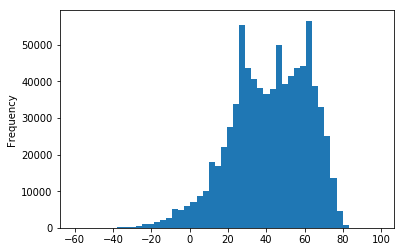

In [38]:
df[df.datatype == 'TMIN'].value.plot(kind='hist', bins=50)

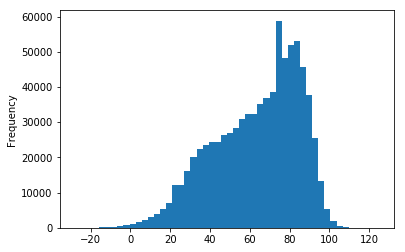

In [33]:
df[df.datatype == 'TMAX'].value.plot(kind='hist', bins=50)

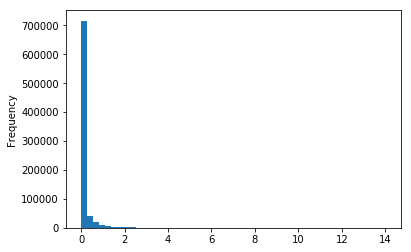

In [35]:
df[df.datatype == 'PRCP'].value.plot(kind='hist', bins=50)